In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from pobieranie import Downloader

downloader = Downloader("C:/Moje/Python proj")

print("📂 CSV w folderze:")
print(downloader.lista_csv())

print("\n🔍 Czy jest plik E0_23_24.csv?")
print(downloader.czy_istnieje("E0_23_24.csv"))


📂 CSV w folderze:
['E0_21_22.csv', 'E0_22_23.csv', 'E0_23_24.csv', 'E0_24_25.csv']

🔍 Czy jest plik E0_23_24.csv?
True


In [4]:
from analiza import AnalyzerMultiSeason

pliki = ['E0_21_22.csv', 'E0_22_23.csv', 'E0_23_24.csv', 'E0_24_25.csv']
folder = "C:/Moje/Python proj"

analyzer = AnalyzerMultiSeason(folder, pliki)

# 1. Wczytaj dane
df = analyzer.wczytaj_wszystkie_dane()

# 2. Dodaj zwycięzców
analyzer.dodaj_kolumne_zwyciezca()

# 3. Sprawdź dane
df.head()


✅ Załadowano 1520 meczów z 4 plików.
🏆 Dodano kolumnę 'Zwyciezca'.


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA,Zwyciezca
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home


In [5]:
print("Kolumny w DataFrame:")
print(df.columns.tolist())


Kolumny w DataFrame:
['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'Sezon', 'BFH', 'BFD', 'BFA', '1XBH', '1XBD', '1XBA', 'BF

In [30]:
from statystyki import StatystykiSezonu

# ⬇️ Utwórz obiekt na podstawie wcześniej wczytanego df
stats = StatystykiSezonu(df)

# 🔢 Policzenie średniej liczby goli
stats.srednia_goli_per_sezon()


⚽ Średnia liczba goli na mecz w każdym sezonie:
Sezon
21_22    2.82
22_23    2.85
23_24    3.28
24_25    2.93
Name: Gole_razem, dtype: float64


Sezon
21_22    2.82
22_23    2.85
23_24    3.28
24_25    2.93
Name: Gole_razem, dtype: float64

In [31]:
# 🔍 Analiza: czy gospodarze są faworyzowani przez sędziów?
stats.analiza_faul_kartki()


🧑‍⚖️ Analiza fauli i kartek (gospodarze vs goście):
                   Home   Away
Średnie faule    10.550  10.93
Żółte kartki      1.780   2.02
Czerwone kartki   0.059   0.06


,Home,Away
Średnie faule,10.550,10.93
Żółte kartki,1.780,2.02
Czerwone kartki,0.059,0.06


In [32]:
# 🏟️ Analiza: kto częściej wygrywa?
stats.udzial_wygranych_home_away()


📊 Udział wygranych: Gospodarz vs Gość vs Remis
  Zwyciezca  Udział [%]
0      Home       44.54
1      Away       32.43
2      Draw       23.03


,Zwyciezca,Udział [%]
0,Home,44.54
1,Away,32.43
2,Draw,23.03


In [33]:
stats.srednia_strzalow()
stats.skutecznosc_strzalow()


🎯 Średnia liczba strzałów na mecz:
               Rodzaj  Średnia
0  Strzały gospodarzy    14.24
1       Strzały gości    11.85
🥅 Skuteczność (celność) strzałów:
      Drużyna  Celność [%]
0  Gospodarze        35.40
1      Goście        36.05


,Drużyna,Celność [%]
0,Gospodarze,35.40
1,Goście,36.05


In [34]:
df_druzyny_strzaly = stats.statystyki_strzalow_druzyn()


📊 Analiza strzałów i celności dla każdej drużyny (dom/wyjazd)
             Drużyna  Sr. strzały (dom)  Sr. celność (dom)  \
0            Arsenal              17.99              35.59   
1        Aston Villa              13.61              38.02   
2        Bournemouth              13.72              35.14   
3          Brentford              12.71              39.54   
4           Brighton              16.11              34.00   
5            Burnley              12.71              29.60   
6            Chelsea              16.28              36.34   
7     Crystal Palace              13.08              33.61   
8            Everton              12.70              36.18   
9             Fulham              13.28              36.41   
10           Ipswich              10.95              33.33   
11             Leeds              13.66              30.25   
12         Leicester              10.95              36.47   
13         Liverpool              20.05              35.38   
14      

In [35]:
from statystyki import StatystykiSezonu

# jeśli jeszcze nie:
# df = analyzer.wczytaj_wszystkie_dane()

stats = StatystykiSezonu(df)
df_gole_szeroko = stats.gole_druzyn_na_sezon()

df_gole_szeroko


Sezon,Lp.,Druzyna,21_22,22_23,23_24,24_25
0,1,Liverpool,94.0,75.0,86.0,86.0
1,2,Man City,99.0,94.0,96.0,72.0
2,3,Arsenal,61.0,88.0,91.0,69.0
3,4,Newcastle,44.0,68.0,85.0,68.0
4,5,Brentford,48.0,58.0,56.0,66.0
5,6,Brighton,42.0,72.0,55.0,66.0
6,7,Tottenham,69.0,70.0,74.0,64.0
7,8,Chelsea,76.0,38.0,77.0,64.0
8,9,Aston Villa,52.0,51.0,76.0,58.0
9,10,Nott'm Forest,0.0,38.0,49.0,58.0


In [36]:
df_xg_szeroko = stats.xg_per_season()
df_xg_szeroko




Sezon  Lp.           Drużyna  21_22  22_23  23_24  24_25
0        1           Chelsea  67.34  52.15  70.97  71.96
1        2          Man City  77.90  68.33  91.76  68.33
2        3         Liverpool  82.85  68.66  88.13  66.68
3        4          Brighton  47.20  73.94  68.66  61.40
4        5         Tottenham  54.46  63.71  70.64  61.07
5        6         Brentford  49.18  53.47  56.77  60.74
6        7       Bournemouth   0.00  43.90  61.07  60.41
7        8        Man United  60.41  65.03  63.71  57.44
8        9            Fulham   0.00  45.55  58.76  57.10
9       10    Crystal Palace  48.52  43.24  53.80  56.11
10      11     Nott'm Forest   0.00  37.96  48.85  54.79
11      12       Aston Villa  53.47  48.52  62.72  54.46
12      13         Newcastle  48.85  56.44  70.31  54.46
13      14           Arsenal  65.03  64.04  66.68  54.13
14      15            Wolves  43.24  41.26  50.50  51.49
15      16          West Ham  52.15  47.86  49.51  48.19
16      17           Everton  3

Sezon,Lp.,Drużyna,21_22,22_23,23_24,24_25
0,1,Chelsea,67.34,52.15,70.97,71.96
1,2,Man City,77.90,68.33,91.76,68.33
2,3,Liverpool,82.85,68.66,88.13,66.68
3,4,Brighton,47.20,73.94,68.66,61.40
4,5,Tottenham,54.46,63.71,70.64,61.07
5,6,Brentford,49.18,53.47,56.77,60.74
6,7,Bournemouth,0.00,43.90,61.07,60.41
7,8,Man United,60.41,65.03,63.71,57.44
8,9,Fulham,0.00,45.55,58.76,57.10
9,10,Crystal Palace,48.52,43.24,53.80,56.11


In [37]:
from pobieranie import wczytaj_dane_z_folderu

df_all = wczytaj_dane_z_folderu("C:/Moje/Python proj")


In [38]:
from statystyki import StatystykiSezonu
stat = StatystykiSezonu(df_all)
stat.srednia_goli_per_sezon()


⚽ Średnia liczba goli na mecz w każdym sezonie:
Sezon
E0_21_22    2.82
E0_22_23    2.85
E0_23_24    3.28
E0_24_25    2.93
Name: Gole_razem, dtype: float64


Sezon
E0_21_22    2.82
E0_22_23    2.85
E0_23_24    3.28
E0_24_25    2.93
Name: Gole_razem, dtype: float64

In [41]:
from statystyki import StatystykiSezonu

stats = StatystykiSezonu(df)  # zakładam że df to twój połączony dataframe z wszystkimi sezonami
srednie_gole = stats.srednia_goli_per_sezon()


⚽ Średnia liczba goli na mecz w każdym sezonie:
Sezon
21_22    2.82
22_23    2.85
23_24    3.28
24_25    2.93
Name: Gole_razem, dtype: float64


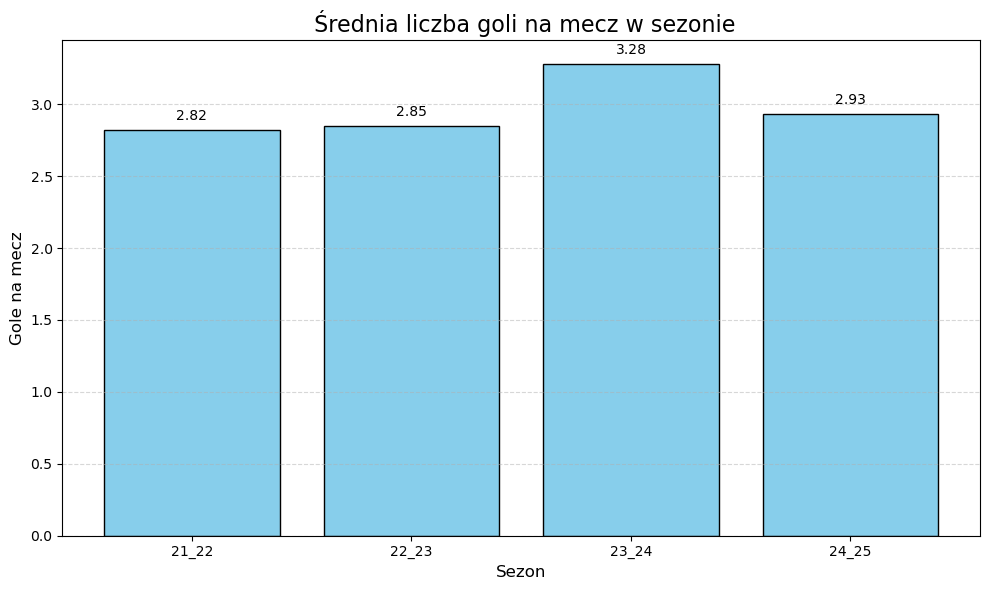

In [42]:
import matplotlib.pyplot as plt

# Konwersja do DataFrame
df_gole = srednie_gole.reset_index()
df_gole.columns = ["Sezon", "Średnia goli"]

# Styl wykresu
plt.figure(figsize=(10, 6))
bars = plt.bar(df_gole["Sezon"], df_gole["Średnia goli"], color="skyblue", edgecolor="black")

# Dodanie wartości na słupkach
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Tytuły i podpisy
plt.title(" Średnia liczba goli na mecz w sezonie", fontsize=16)
plt.xlabel("Sezon", fontsize=12)
plt.ylabel("Gole na mecz", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [52]:
df_kartki = stat.analiza_faul_kartki()


🧑‍⚖️ Analiza fauli i kartek (gospodarze vs goście):
                   Home   Away
Średnie faule    10.550  10.93
Żółte kartki      1.780   2.02
Czerwone kartki   0.059   0.06


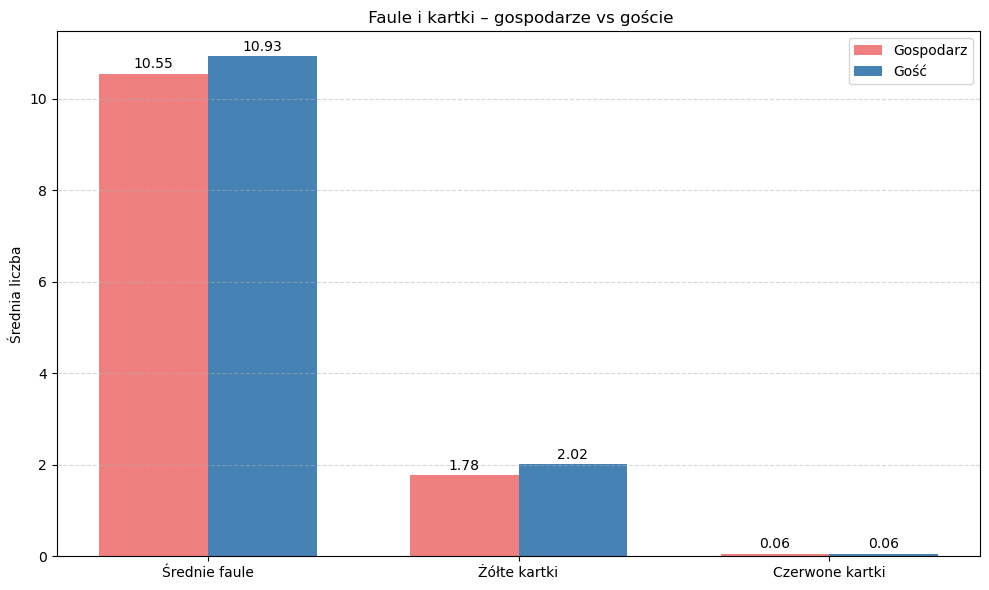

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Przygotowanie danych
kategorie = df_kartki.index.tolist()
home = df_kartki["Home"].values
away = df_kartki["Away"].values

x = np.arange(len(kategorie))
width = 0.35  # szerokość słupków

# Wykres
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, home, width, label='Gospodarz', color='lightcoral')
bars2 = plt.bar(x + width/2, away, width, label='Gość', color='steelblue')

# Wartości na słupkach
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Etykiety i tytuł
plt.xticks(x, kategorie)
plt.ylabel("Średnia liczba")
plt.title(" Faule i kartki – gospodarze vs goście")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




📊 Udział wygranych: Gospodarz vs Gość vs Remis
  Zwyciezca  Udział [%]
0      Home       44.54
1      Away       32.43
2      Draw       23.03


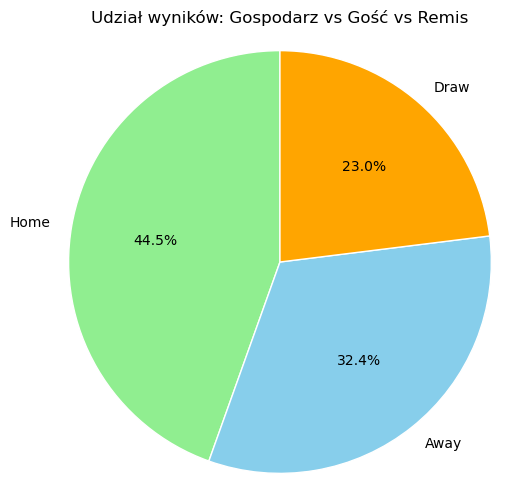

In [63]:
import matplotlib.pyplot as plt

# Zakładamy, że stats to twoja instancja klasy StatystykiSezonu
df_udzial = stats.udzial_wygranych_home_away()

# 🛠 Poprawka: zamień 'Wynik' na 'Zwyciezca'
labels = df_udzial["Zwyciezca"].tolist()
sizes = df_udzial["Udział [%]"].tolist()
colors = ["lightgreen", "skyblue", "orange"]

# 🥧 Wykres kołowy
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Udział wyników: Gospodarz vs Gość vs Remis")
plt.axis("equal")
plt.show()


In [64]:
stats.srednia_strzalow()
stats.skutecznosc_strzalow()


🎯 Średnia liczba strzałów na mecz:
               Rodzaj  Średnia
0  Strzały gospodarzy    14.24
1       Strzały gości    11.85
🥅 Skuteczność (celność) strzałów:
      Drużyna  Celność [%]
0  Gospodarze        35.40
1      Goście        36.05


,Drużyna,Celność [%]
0,Gospodarze,35.40
1,Goście,36.05


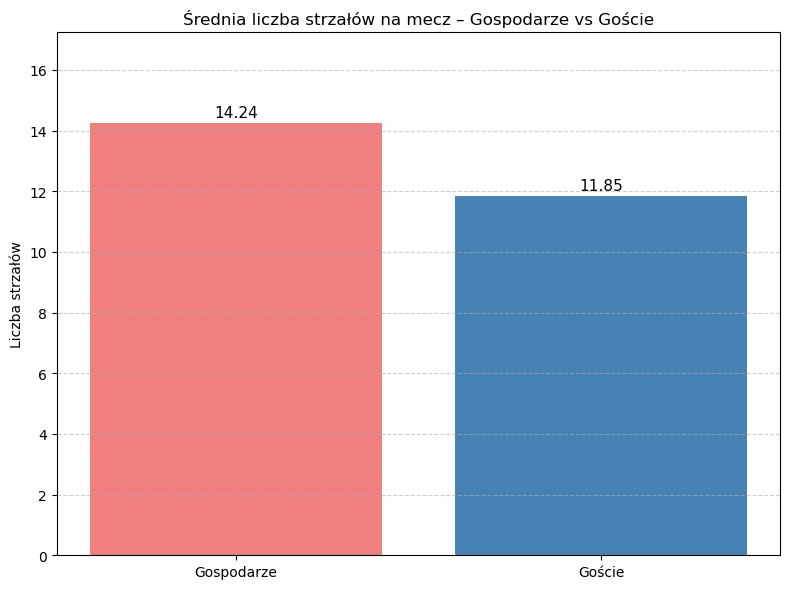

In [71]:
import matplotlib.pyplot as plt

# Dane (upewnij się, że to są dokładnie te wartości)
druzyny = ["Gospodarze", "Goście"]
srednia_strzalow = [14.24, 11.85]

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
bars = plt.bar(druzyny, srednia_strzalow, color=["lightcoral", "steelblue"])

# Dodanie wartości nad słupkami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.2f}", ha="center", fontsize=11)

plt.title("Średnia liczba strzałów na mecz – Gospodarze vs Goście")
plt.ylabel("Liczba strzałów")
plt.ylim(0, max(srednia_strzalow) + 3)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


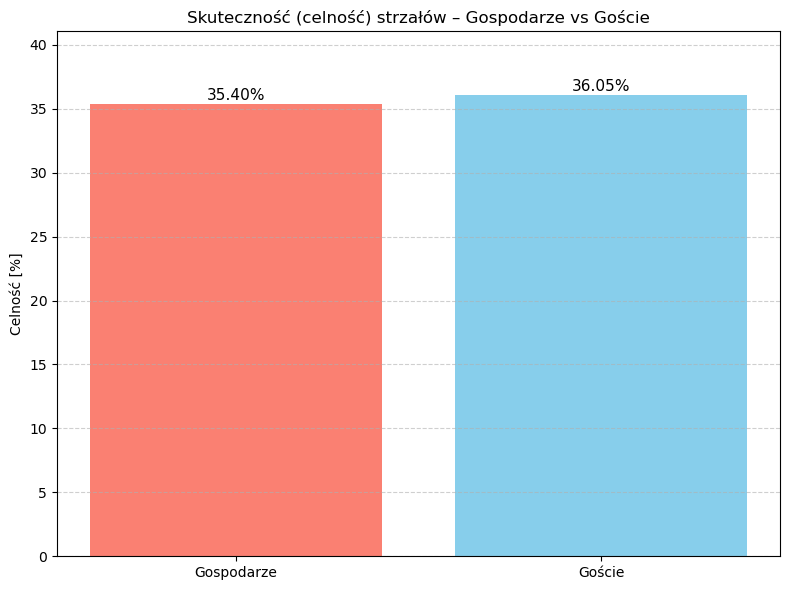

In [22]:
import matplotlib.pyplot as plt

# Dane
druzyny = ["Gospodarze", "Goście"]
celnosc = [35.40, 36.05]

# Wykres słupkowy
plt.figure(figsize=(8, 6))
bars = plt.bar(druzyny, celnosc, color=["salmon", "skyblue"])

# Dodanie wartości nad słupkami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.2f}%", ha="center", fontsize=11)

plt.title("Skuteczność (celność) strzałów – Gospodarze vs Goście")
plt.ylabel("Celność [%]")
plt.ylim(0, max(celnosc) + 5)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [72]:
df_druzyny_strzaly = stats.statystyki_strzalow_druzyn()

📊 Analiza strzałów i celności dla każdej drużyny (dom/wyjazd)
             Drużyna  Sr. strzały (dom)  Sr. celność (dom)  \
0            Arsenal              17.99              35.59   
1        Aston Villa              13.61              38.02   
2        Bournemouth              13.72              35.14   
3          Brentford              12.71              39.54   
4           Brighton              16.11              34.00   
5            Burnley              12.71              29.60   
6            Chelsea              16.28              36.34   
7     Crystal Palace              13.08              33.61   
8            Everton              12.70              36.18   
9             Fulham              13.28              36.41   
10           Ipswich              10.95              33.33   
11             Leeds              13.66              30.25   
12         Leicester              10.95              36.47   
13         Liverpool              20.05              35.38   
14      

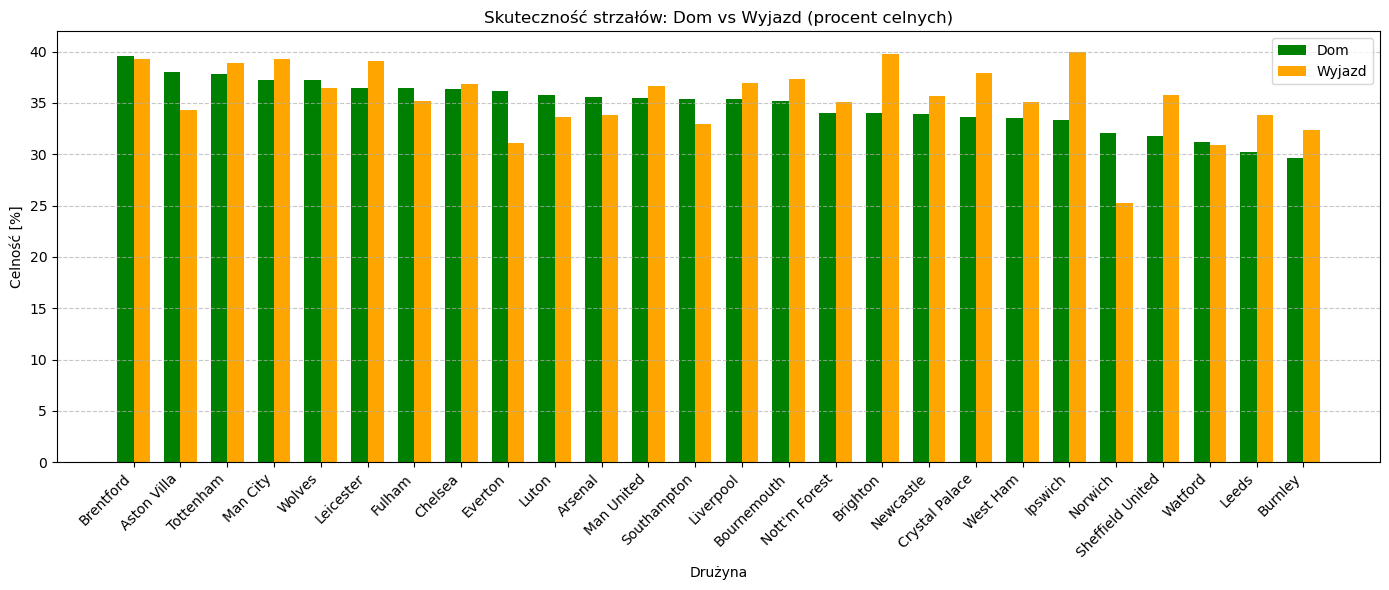

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Posortuj dane według skuteczności w meczach domowych
df_celnosc_sorted = df_druzyny_strzaly.sort_values(by="Sr. celność (dom)", ascending=False)

# Dane
druzyny = df_celnosc_sorted["Drużyna"]
celnosc_dom = df_celnosc_sorted["Sr. celność (dom)"]
celnosc_wyjazd = df_celnosc_sorted["Sr. celność (wyjazd)"]

x = np.arange(len(druzyny))
width = 0.35

# Wykres
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, celnosc_dom, width, label="Dom", color="green")
bars2 = ax.bar(x + width/2, celnosc_wyjazd, width, label="Wyjazd", color="orange")

# Opis
ax.set_title("Skuteczność strzałów: Dom vs Wyjazd (procent celnych)")
ax.set_xlabel("Drużyna")
ax.set_ylabel("Celność [%]")
ax.set_xticks(x)
ax.set_xticklabels(druzyny, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


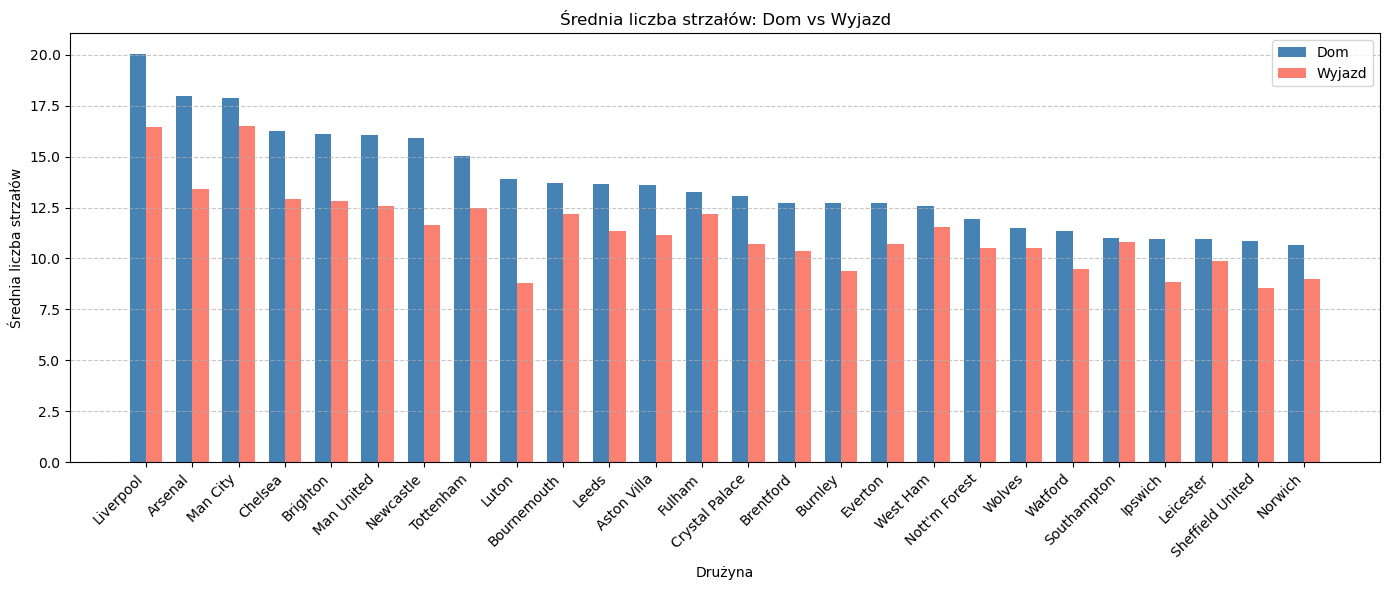

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Posortuj dane według liczby strzałów w meczach domowych
df_strzaly_sorted = df_druzyny_strzaly.sort_values(by="Sr. strzały (dom)", ascending=False)

# Dane
druzyny = df_strzaly_sorted["Drużyna"]
strzaly_dom = df_strzaly_sorted["Sr. strzały (dom)"]
strzaly_wyjazd = df_strzaly_sorted["Sr. strzały (wyjazd)"]

x = np.arange(len(druzyny))
width = 0.35

# Wykres
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, strzaly_dom, width, label="Dom", color="steelblue")
bars2 = ax.bar(x + width/2, strzaly_wyjazd, width, label="Wyjazd", color="salmon")

# Opis
ax.set_title("Średnia liczba strzałów: Dom vs Wyjazd")
ax.set_xlabel("Drużyna")
ax.set_ylabel("Średnia liczba strzałów")
ax.set_xticks(x)
ax.set_xticklabels(druzyny, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Sezon  Lp.           Drużyna  21_22  22_23  23_24  24_25
0        1           Chelsea  67.34  52.15  70.97  71.96
1        2          Man City  77.90  68.33  91.76  68.33
2        3         Liverpool  82.85  68.66  88.13  66.68
3        4          Brighton  47.20  73.94  68.66  61.40
4        5         Tottenham  54.46  63.71  70.64  61.07
5        6         Brentford  49.18  53.47  56.77  60.74
6        7       Bournemouth   0.00  43.90  61.07  60.41
7        8        Man United  60.41  65.03  63.71  57.44
8        9            Fulham   0.00  45.55  58.76  57.10
9       10    Crystal Palace  48.52  43.24  53.80  56.11
10      11     Nott'm Forest   0.00  37.96  48.85  54.79
11      12       Aston Villa  53.47  48.52  62.72  54.46
12      13         Newcastle  48.85  56.44  70.31  54.46
13      14           Arsenal  65.03  64.04  66.68  54.13
14      15            Wolves  43.24  41.26  50.50  51.49
15      16          West Ham  52.15  47.86  49.51  48.19
16      17           Everton  3

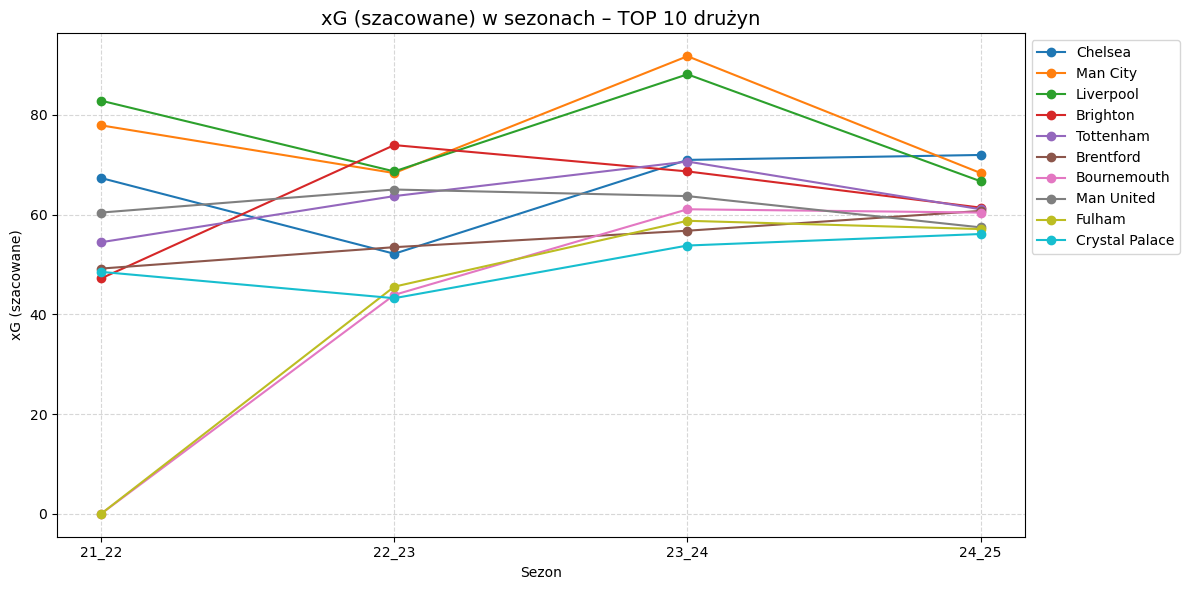

In [74]:
import matplotlib.pyplot as plt

# 📥 Pobierz dane
df_xg_szeroko = stats.xg_per_season()

# 🎯 Wybierz drużyny z top 10 ostatniego sezonu
ostatni_sezon = df_xg_szeroko.columns[-1]  # np. '24_25'
df_top10 = df_xg_szeroko.head(10).copy()

# 🔁 Przekształcenie do formatu long
df_long = df_top10.melt(id_vars=["Lp.", "Drużyna"], var_name="Sezon", value_name="xG")
df_long = df_long[df_long["Sezon"].str.contains("_")]  # tylko kolumny z sezonami

# 🎨 Tworzenie wykresu
plt.figure(figsize=(12, 6))

for druzyna in df_long["Drużyna"].unique():
    dane = df_long[df_long["Drużyna"] == druzyna]
    plt.plot(dane["Sezon"], dane["xG"], marker="o", label=druzyna)

plt.title("xG (szacowane) w sezonach – TOP 10 drużyn", fontsize=14)
plt.xlabel("Sezon")
plt.ylabel("xG (szacowane)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [76]:
#teraz tworzymy baze danych mongodb

In [1]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["PremierLeague"]
kolekcja = db["mecze"]


In [2]:
import pandas as pd

pliki = [
    ("E0_21_22.csv", "2021/2022"),
    ("E0_22_23.csv", "2022/2023"),
    ("E0_23_24.csv", "2023/2024"),
    ("E0_24_25.csv", "2024/2025")
]

for plik, sezon in pliki:
    df = pd.read_csv(plik)
    df["Sezon"] = sezon
    dane_json = df.to_dict(orient="records")
    kolekcja.insert_many(dane_json)


In [4]:
from pymongo import MongoClient
import pandas as pd

# Połączenie z lokalnym MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["PremierLeague"]
kolekcja = db["mecze"]

# Wczytanie danych do Pandas z MongoDB (np. tylko sezon 2023/2024)
dane_mongo = pd.DataFrame(list(kolekcja.find({"Sezon": "2023/2024"})))

# Podgląd danych
print(dane_mongo.head())


                        _id Div        Date   Time     HomeTeam  \
0  685b9e381075ba55be9fc436  E0  11/08/2023  20:00      Burnley   
1  685b9e381075ba55be9fc437  E0  12/08/2023  12:30      Arsenal   
2  685b9e381075ba55be9fc438  E0  12/08/2023  15:00  Bournemouth   
3  685b9e381075ba55be9fc439  E0  12/08/2023  15:00     Brighton   
4  685b9e381075ba55be9fc43a  E0  12/08/2023  15:00      Everton   

        AwayTeam  FTHG  FTAG FTR  HTHG  ...  AHCh B365CAHH B365CAHA  PCAHH  \
0       Man City     0     3   A     0  ...  1.50     1.95     1.98   1.95   
1  Nott'm Forest     2     1   H     2  ... -2.00     1.95     1.98   1.93   
2       West Ham     1     1   D     0  ...  0.00     2.02     1.91   2.01   
3          Luton     4     1   H     1  ... -1.75     2.01     1.92   2.00   
4         Fulham     0     1   A     0  ... -0.25     2.06     1.87   2.04   

   PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA      Sezon  
0   1.97      NaN      NaN     1.92     1.95  2023/2024  
1   1.97    

In [5]:
dane_mongo["Gole"] = dane_mongo["FTHG"] + dane_mongo["FTAG"]
print("Średnia goli na mecz:", dane_mongo["Gole"].mean())


Średnia goli na mecz: 3.278947368421053


In [10]:
dane_mongo["Najczęściej występujące wyniki:"] = dane_mongo["FTHG"].astype(str) + "-" + dane_mongo["FTAG"].astype(str)
print(dane_mongo["Najczęściej występujące wyniki:"].value_counts().head())


Najczęściej występujące wyniki:
1-1    38
2-1    31
2-2    27
3-1    26
1-2    24
Name: count, dtype: int64


In [23]:
print("Wygrane w domu:")
print(dane_mongo.groupby("HomeTeam")["FTHG"].sum().sort_values(ascending=False).head())


Wygrane w domu:
HomeTeam
Man City       51
Liverpool      49
Newcastle      49
Aston Villa    48
Arsenal        48
Name: FTHG, dtype: int64


In [13]:
dokument = kolekcja.find_one()
print(dokument)



{'_id': ObjectId('685b9e381075ba55be9fc13e'), 'Div': 'E0', 'Date': '13/08/2021', 'Time': '20:00', 'HomeTeam': 'Brentford', 'AwayTeam': 'Arsenal', 'FTHG': 2, 'FTAG': 0, 'FTR': 'H', 'HTHG': 1, 'HTAG': 0, 'HTR': 'H', 'Referee': 'M Oliver', 'HS': 8, 'AS': 22, 'HST': 3, 'AST': 4, 'HF': 12, 'AF': 8, 'HC': 2, 'AC': 5, 'HY': 0, 'AY': 0, 'HR': 0, 'AR': 0, 'B365H': 4.0, 'B365D': 3.4, 'B365A': 1.95, 'BWH': 4.0, 'BWD': 3.5, 'BWA': 1.95, 'IWH': 3.8, 'IWD': 3.4, 'IWA': 2.05, 'PSH': 4.05, 'PSD': 3.46, 'PSA': 2.05, 'WHH': 4.0, 'WHD': 3.4, 'WHA': 1.9, 'VCH': 4.1, 'VCD': 3.4, 'VCA': 2.0, 'MaxH': 4.62, 'MaxD': 3.72, 'MaxA': 2.1, 'AvgH': 4.02, 'AvgD': 3.43, 'AvgA': 2.02, 'B365>2.5': 2.1, 'B365<2.5': 1.72, 'P>2.5': 2.22, 'P<2.5': 1.73, 'Max>2.5': 2.26, 'Max<2.5': 1.83, 'Avg>2.5': 2.16, 'Avg<2.5': 1.73, 'AHh': 0.5, 'B365AHH': 1.86, 'B365AHA': 2.07, 'PAHH': 1.88, 'PAHA': 2.06, 'MaxAHH': 2.05, 'MaxAHA': 2.08, 'AvgAHH': 1.87, 'AvgAHA': 2.03, 'B365CH': 3.8, 'B365CD': 3.25, 'B365CA': 2.05, 'BWCH': 3.8, 'BWCD': 3

In [24]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["PremierLeague"]
kolekcja = db["mecze"]

# Wyszukiwanie meczu Arsenal vs Liverpool w sezonie 2024/2025
wynik = kolekcja.find_one({
    "Sezon": "2024/2025",
    "$or": [
        {"HomeTeam": "Arsenal", "AwayTeam": "Liverpool"},
        {"HomeTeam": "Liverpool", "AwayTeam": "Arsenal"}
    ]
})

if wynik:
    print("🔎 Znaleziony mecz:")
    print(f"{wynik['Date']} | {wynik['HomeTeam']} {wynik['FTHG']} - {wynik['FTAG']} {wynik['AwayTeam']}")
else:
    print("❌ Brak meczu Arsenal vs Liverpool w sezonie 2024/2025.")


🔎 Znaleziony mecz:
27/10/2024 | Arsenal 2 - 2 Liverpool


In [25]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["PremierLeague"]
kolekcja = db["mecze"]

# Szukamy meczu między Arsenalem a Liverpoolem w sezonie 2024/2025
mecz = kolekcja.find_one({
    "Sezon": "2024/2025",
    "$or": [
        {"HomeTeam": "Arsenal", "AwayTeam": "Liverpool"},
        {"HomeTeam": "Liverpool", "AwayTeam": "Arsenal"}
    ]
})

if mecz:
    print("🔎 Znaleziony mecz:")
    print(f"{mecz['Date']} | {mecz['HomeTeam']} {mecz['FTHG']} - {mecz['FTAG']} {mecz['AwayTeam']}")
    print(f"🟨 Żółte kartki: {mecz['HomeTeam']} - {mecz.get('HY', 0)}, {mecz['AwayTeam']} - {mecz.get('AY', 0)}")
    print(f"🟥 Czerwone kartki: {mecz['HomeTeam']} - {mecz.get('HR', 0)}, {mecz['AwayTeam']} - {mecz.get('AR', 0)}")
else:
    print("❌ Brak meczu Arsenal vs Liverpool w sezonie 2024/2025.")


🔎 Znaleziony mecz:
27/10/2024 | Arsenal 2 - 2 Liverpool
🟨 Żółte kartki: Arsenal - 2, Liverpool - 2
🟥 Czerwone kartki: Arsenal - 0, Liverpool - 0


In [26]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["PremierLeague"]
kolekcja = db["mecze"]

# Szukamy meczu Man City vs Man United z sezonu 2023/2024
mecz = kolekcja.find_one({
    "Sezon": "2023/2024",
    "$or": [
        {"HomeTeam": "Man City", "AwayTeam": "Man United"},
        {"HomeTeam": "Man United", "AwayTeam": "Man City"}
    ]
})

if mecz:
    print("🔎 Znaleziony mecz:")
    print(f"{mecz['Date']} | {mecz['HomeTeam']} {mecz['FTHG']} - {mecz['FTAG']} {mecz['AwayTeam']}")
    print(f"💥 Faule: {mecz['HomeTeam']} - {mecz.get('HF', 0)}, {mecz['AwayTeam']} - {mecz.get('AF', 0)}")
else:
    print("❌ Brak meczu Man City vs Man United w sezonie 2023/2024.")


🔎 Znaleziony mecz:
29/10/2023 | Man United 0 - 3 Man City
💥 Faule: Man United - 9, Man City - 4


In [27]:
from pymongo import MongoClient
import pandas as pd

client = MongoClient("mongodb://localhost:27017/")
db = client["PremierLeague"]
kolekcja = db["mecze"]

# Pobierz wszystkie mecze z sezonu 2022/2023
mecze = list(kolekcja.find({"Sezon": "2022/2023"}))

# Konwertuj do DataFrame
df = pd.DataFrame(mecze)

# Sumujemy celne strzały dla każdej drużyny (HomeTeam + AwayTeam)
home_shots = df.groupby("HomeTeam")["HST"].sum()
away_shots = df.groupby("AwayTeam")["AST"].sum()

# Sumujemy obie serie
total_shots = home_shots.add(away_shots, fill_value=0)

# Szukamy drużyny z największą liczbą celnych strzałów
top_team = total_shots.idxmax()
top_value = int(total_shots.max())

print(f"W sezonie 22/23 w Premier League najwięcej strzałów celnych oddała drużyna {top_team} – {top_value} strzałów.")


W sezonie 22/23 w Premier League najwięcej strzałów celnych oddała drużyna Brighton – 231 strzałów.
